# Importing Packages

In [1]:
import matplotlib.pyplot as plt
from networkx_viewer import Viewer
import matplotlib.colors as mcolors
from collections import defaultdict
import networkx as nx 


%matplotlib inline

In [2]:
def draw(G, measures, measure_name):
  #* https://stackoverflow.com/a/52013202
  #* https://aksakalli.github.io/2017/07/17/network-centrality-measures-and-their-visualization.html
  #* https://www.datacamp.com/community/tutorials/social-network-analysis-python

  #* Create two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  pos = nx.spring_layout(G)

  #* Set the size of each node based on its corresponding measure value.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, 
                                  cmap=plt.cm.plasma,
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
  
  #* Draw the edges of the graph.
  edges = nx.draw_networkx_edges(G, pos)
  
  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, blue color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color='blue', style='dashed')

  #* Add labels to the nodes with a font size of 10, blue color, and sans-serif font family.
  #nx.draw_networkx_labels(G, pos, font_size=10, font_color='blue', font_family='sans-serif')
  
  #* Set the title of the plot, add a color bar, turn off the axis, and display the plot.
  plt.title(measure_name)
  plt.colorbar(nodes)
  plt.axis('off')
  plt.show()


In [3]:
def plot_Gp(G, measures):
  # Set the figure size to make the plot high-definition.
  plt.figure(figsize=(50, 50), dpi=300)

  #* Define two lists of edges based on their weight.
  #* 'elarge' contains edges with weight greater than 5.
  #* 'esmall' contains edges with weight less than or equal to 5.
  elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 5]
  esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 5]

  #* Generate a spring layout for the graph.
  #* This layout treats edges as springs holding nodes close, while treating nodes as repelling objects.
  pos = nx.spring_layout(G, iterations=13, scale=300, seed=1234)

  #* Set the size of each node based on its corresponding measure value.
  #* The size is multiplied by 1000 for better visibility.
  node_size = [v * 1000 for v in measures.values()]

  #* Draw the nodes of the graph with their size and color determined by the measure values.
  #* The color map 'plt.cm.plasma' is used for coloring the nodes.
  nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size, cmap=plt.cm.plasma, 
                                  node_color=list(measures.values()),
                                  nodelist=measures.keys())

  #* Set the color normalization of the nodes to be logarithmic.
  #* This can be useful if the measure values vary widely.
  nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))

  #* Create a color map based on the node labels.
  #* Different labels are mapped to different colors. 
  # color_map = []
  # for node in G:
  #   if 'fac' in node:
  #       color_map.append('blue')
  #   elif 'stu' in node:
  #       color_map.append('green')
  #   elif 'adm' in node:
  #       color_map.append('yellow')
  #   elif 'sub' in node:
  #       color_map.append('orange')
  #   elif 'isp' in node:
  #       color_map.append('red')
  #   elif 'bis' in node:
  #       color_map.append('purple')
  #   elif 'par' in node:
  #       color_map.append('black')
  #   elif 'sup' in node:
  #       color_map.append('aqua')
  #   elif node in ['grade', 'assignment', 'Bulletin Board', 're-assign', 'enroll', 'register', 'transfer', 'drop']:
  #       color_map.append('gray')  # white for the specific nodes
  #   else:
  #       print (node)


  # Add the 'color' attribute to the nodes based on the node labels
  color_map = {}
  for node in G.nodes:
      node_str = str(node)
      if 'fac' in node_str:
          color_map[node] = 'blue'
      elif 'stu' in node_str:
          color_map[node] = 'green'
      elif 'adm' in node_str:
          color_map[node] = 'yellow'
      elif 'sub' in node_str:
          color_map[node] = 'orange'
      elif 'isp' in node_str:
          color_map[node] = 'red'
      elif 'bis' in node_str:
          color_map[node] = 'purple'
      elif 'par' in node_str:
          color_map[node] = 'black'
      elif 'sup' in node_str:
          color_map[node] = 'aqua'
      elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register', 'like', 'happy', 'surprise', 'sad','angry', 'room_', 'commented']:
          color_map[node] = 'gray'
      else:
          print(node_str)

  #* Draw the nodes of the graph again with a fixed size of 10 and a color map based on the node labels.
  nx.draw_networkx_nodes(G, pos, node_size=10, node_color=color_map, cmap=plt.cm.plasma)

  #* Draw the 'elarge' and 'esmall' edges with different styles.
  #* The 'elarge' edges are drawn with a width of 2 and gray color.
  #* The 'esmall' edges are drawn with a width of 2, transparency of 0.5, gray color, and dashed style.
  nx.draw_networkx_edges(G, pos, edgelist=elarge, edge_color='gray', width=1)
  nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, alpha=0.5, edge_color='gray', style='dashed')

  #* Add labels to the nodes with a font size of 10, gray color, and sans-serif font family.
  nx.draw_networkx_labels(G, pos, font_size=3, font_color='black', font_family='sans-serif')

  #* Turn off the axis and display the plot.
  plt.axis('off')

  #* Increase the DPI to 300 for a high-quality plot.
  plt.savefig("network.png", dpi=300)
  
  #* Display the plot 
  plt.show()


In [4]:
def writeandrender(filename, centrality):
  #* Extract the measure from the centrality dictionary.
  cmeasure = centrality["measure"]
  
  #* Sort the items in the measure dictionary in descending order based on their values.
  sorted_x = sorted(cmeasure.items(), key=lambda kv: kv[1], reverse=True)

  #* Check the 'overwrite' flag in the centrality dictionary.
  #* If it's True, open the file in write mode, which overwrites the existing content.
  #* If it's False, open the file in append mode, which adds to the existing content.
  if centrality["overwrite"]:
      f = open(filename + centrality["prefix"] + ".txt", 'w')
  else:
      f = open(filename + centrality["prefix"] + ".txt", 'a')
  
  #* Write the sorted items to the file.
  f.write(str(sorted_x))
  
  #* Close the file.
  f.close()

  #* Draw the weighted graph with the measure and the name from the centrality dictionary.
  draw(G, centrality["measure"], centrality["name"])

# Data Extraction for the Whole Month of January 2020

In [5]:
import pandas as pd

# Load the data into a pandas DataFrame
cs_dept_computer = 'C:/Users/IIT_C/OneDrive/Desktop/social_network_analysis/SNA_code/raw_data.csv'
mark_desktop = 'C:/Users/boyma/OneDrive/Desktop/learning_interactions/SNA_code/raw_data.csv' 
df = pd.read_csv(mark_desktop)

# Convert the 'ts' column to datetime
df['ts'] = pd.to_datetime(df['ts'])

# Define start and end date
start_date = '2020-12-01'
end_date = '2020-12-31'

# Filter rows based on date range
mask = (df['ts'] >= start_date) & (df['ts'] <= end_date)
df = df.loc[mask]

C:\Users\boyma\AppData\Local\Temp\ipykernel_24240\4091910286.py:6: DtypeWarning: Columns (1,2,3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(mark_desktop)


# Data Filtration Phase

- Removing the generic users from the dataset: "7505d64a54e061b7acd54ccd58b49dc43500b635"

In [6]:
# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'receiverid' is "7505d64a54e061b7acd54ccd58b49dc43500b635"
df = df[df['receiverid'] != "7505d64a54e061b7acd54ccd58b49dc43500b635"]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 19211
Number of rows after removing: 19059


- Removing the task: 'Associate Post and Entry' and 'get post and entry link ' from the dataset

In [7]:
# Print the number of rows before removing
print(f"Number of rows before removing: {len(df)}")

# Remove rows where 'type_' is 'Associate Post and Entry' or 'get post and entry link'
df = df[~df['type_'].isin(['Associate Post and Entry', 'get post and entry link '])]

# Print the number of rows after removing
print(f"Number of rows after removing: {len(df)}")


Number of rows before removing: 19059
Number of rows after removing: 19059


### Export into CSV to check whether the date filtration is successful

In [8]:
# Export the DataFrame to a CSV file
df.to_csv('filtered_date_data.csv', index=False)

# Data Transformation Phase
- Transform the data from "reactions" column into their string equivalents in a new column called "emoji"



In [9]:
# Define a mapping from integers to emoji names
reaction_mapping = {
    1: 'like',
    2: 'happy',
    3: 'surprise',
    4: 'sad',
    5: 'angry'
}

# Create a new column 'emoji' by mapping the 'reaction' column to the corresponding emoji names
df['emoji'] = df['reaction'].map(reaction_mapping)


- Transform the rest of the dataset 

In [10]:
import numpy as np

# Define a function to clean the data
def clean_data(x):
    if isinstance(x, str):
        if 'get assignment' in x:
            return 'get_assignment'
        elif 'get raw scores' in x:
            return 'get_raw_scores'
        elif 'get student answer' in x:
            return 'get_student_answer'
        elif 'Joined' in x and 'for Video Conference' in x:
            return 'joined_video_conference'
        elif 'view submission' in x:
            return 'view_submission'
        else:
            return x  # return the original string if it doesn't match any pattern
    return np.nan  # return NaN for non-string data

# Apply the function to the 'type_' column
df['type_'] = df['type_'].apply(clean_data)


### Export to a new csv file to check whether the transformation is sucessful

In [11]:
# Write the DataFrame to a CSV file
df.to_csv('transformed_data.csv', index=False)


# Anonymize the users

In [12]:
import hashlib
import pandas as pd

def anonymize_id(id):
    if pd.isnull(id):
        return ''
    prefix = id[0]
    hash_object = hashlib.sha1(id.encode())
    hex_dig = hash_object.hexdigest()
    if prefix == 'A':
        return 'adm' + hex_dig[:5]
    elif prefix == 'F':
        return 'fac' + hex_dig[:5]
    elif prefix == 'S':
        return 'stu' + hex_dig[:5]
    elif prefix == 'P':
        return 'par' + hex_dig[:5]
    else:
        return 'unk' + hex_dig[:5]

# Create a dictionary to store the original IDs and their corresponding anonymized IDs
anonymized_ids = {}

# Get all unique IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
unique_ids = pd.concat([df['initiatorid'], df['receiverid'], df['reactor'], df['commenter']]).dropna().unique()

# Create a mapping from the original IDs to the hashed IDs
for id in unique_ids:
    anonymized_ids[id] = anonymize_id(id)

# Replace the original IDs with the hashed IDs in the 'initiatorid', 'receiverid', 'reactor', and 'commenter' columns
for column in ['initiatorid', 'receiverid', 'reactor', 'commenter']:
    df[column] = df[column].map(anonymized_ids)


### Export to a new csv to check whether the anonymization is successful

In [13]:
# Write the DataFrame to a CSV file
df.to_csv('anon_data.csv', index=False)

## Mapping the Agent to Task Learning Interactions for the whole month of January 2020

In [14]:
import networkx as nx
import pandas as pd
import csv


# Create a directed graph
G = nx.Graph()

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Check if the IDs are not empty or null
    if pd.notnull(row['initiatorid']) and pd.notnull(row['receiverid']):
        # For Timeline Interactions
        if G.has_edge(row['initiatorid'], row['tltype']):
            G[row['initiatorid']][row['tltype']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['tltype'], weight=1)
        
        if G.has_edge(row['tltype'], row['receiverid']):
            G[row['tltype']][row['receiverid']]['weight'] += 1
        else:
            G.add_edge(row['tltype'], row['receiverid'], weight=1)

    # For Reactions
    if pd.notnull(row['reactor']) and pd.notnull(row['emoji']):
        if row['reactor'] == row['initiatorid']:
            # Add edges from reactor to reaction and from reaction to receiver
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['receiverid']):
                G[row['emoji']][row['receiverid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['receiverid'], weight=1)
        elif row['reactor'] == row['receiverid']:
            # Add edges from reactor to reaction and from reaction to initiator
            if G.has_edge(row['reactor'], row['emoji']):
                G[row['reactor']][row['emoji']]['weight'] += 1
            else:
                G.add_edge(row['reactor'], row['emoji'], weight=1)
            
            if G.has_edge(row['emoji'], row['initiatorid']):
                G[row['emoji']][row['initiatorid']]['weight'] += 1
            else:
                G.add_edge(row['emoji'], row['initiatorid'], weight=1)

    # For Comments
    if pd.notnull(row['commenter']) and pd.notnull(row['initiatorid']):
        if G.has_edge(row['commenter'], row['initiatorid']):
            G[row['commenter']][row['initiatorid']]['weight'] += 1
        else:
            G.add_edge(row['commenter'], row['initiatorid'], weight=1)

    # For Process Mining
    if pd.notnull(row['initiatorid']) and pd.notnull(row['type_']):
        if G.has_edge(row['initiatorid'], row['type_']):
            G[row['initiatorid']][row['type_']]['weight'] += 1
        else:
            G.add_edge(row['initiatorid'], row['type_'], weight=1)

# Get a list of all isolated nodes
isolated_nodes = list(nx.isolates(G))

# Print the isolated nodes
print("Isolated nodes:", isolated_nodes)

# Calculate Eigenvector Centrality and Betweenness Centrality
eigenvector = nx.eigenvector_centrality(G, max_iter=1000)
betweenness = nx.betweenness_centrality(G)

# Add the centrality measures as attributes to the nodes
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')
nx.set_node_attributes(G, betweenness, 'betweenness_centrality')

# Add the 'color' attribute to the nodes based on the node labels
color_map = {}
for node in G.nodes:
    node_str = str(node)
    if node_str[:3] == 'fac':
        color_map[node] = '#0000FF'  # Blue
    elif node_str[:3] == 'stu':
        color_map[node] = '#008000'  # Green
    elif node_str[:3] == 'adm':
        color_map[node] = '#FFFF00'  # Yellow
    elif node_str[:3] == 'sub':
        color_map[node] = '#A52A2A'  # Brown
    elif node_str[:3] == 'par':
        color_map[node] = '#00FF00'  # Lime Green
    elif node_str in ['like', 'happy', 'surprise', 'sad', 'angry']:
        color_map[node] = '#FFC0CB'  # Pink
    elif node_str in ['assignment', 'attendance', 'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register']:
        color_map[node] = '#00FFFF'  # Aqua
    else:
        color_map[node] = '#A52A2A'  # Brown (new color)

nx.set_node_attributes(G, color_map, 'color')


Isolated nodes: []


### Count the Edge Weights

In [15]:
# Function to check edge attributes in a table format
def edges_to_dataframe(G):
    edge_data = []
    for u, v, data in G.edges(data=True):
        edge_data.append({
            'Source': u,
            'Target': v,
            'Weight': data.get('weight', 1),
            'Color': G.nodes[u].get('color', 'unknown') + '-' + G.nodes[v].get('color', 'unknown')
        })
    return pd.DataFrame(edge_data)

# Convert edges to DataFrame
edges_df = edges_to_dataframe(G)

# Display the DataFrame
print(edges_df)

         Source               Target  Weight            Color
0      faccf734           assignment      31  #0000FF-#00FFFF
1      faccf734  view Bulletin Board      41  #0000FF-#A52A2A
2      faccf734      view assignment       9  #0000FF-#A52A2A
3    assignment             studb47c       1  #00FFFF-#008000
4    assignment             stu11535       1  #00FFFF-#008000
..          ...                  ...     ...              ...
957       react             stu29fd4       1  #A52A2A-#008000
958    facf922e        Main Tutorial       1  #0000FF-#A52A2A
959    fac978f1     view collaborate      23  #0000FF-#A52A2A
960    stu92888                  sad       1  #008000-#FFC0CB
961    facd394f        view register       4  #0000FF-#A52A2A

[962 rows x 4 columns]


### Top 20 Nodes with the highest degree

                       Node  Degree
0       view Bulletin Board     304
1           view assignment     122
2                assignment     105
3             view calendar      77
4                     grade      68
5                   comment      61
6   joined_video_conference      53
7            Retrieve Exams      40
8                    enroll      37
9                  fac22eba      31
10              view enroll      20
11                    react      16
12               view grade      13
13                 stuf0324       9
14                 stu8acd8       8
15                 stuca281       7
16                 stuccaaf       7
17                 stuedf73       7
18                 stu68bd3       7
19                 stu34b6d       7


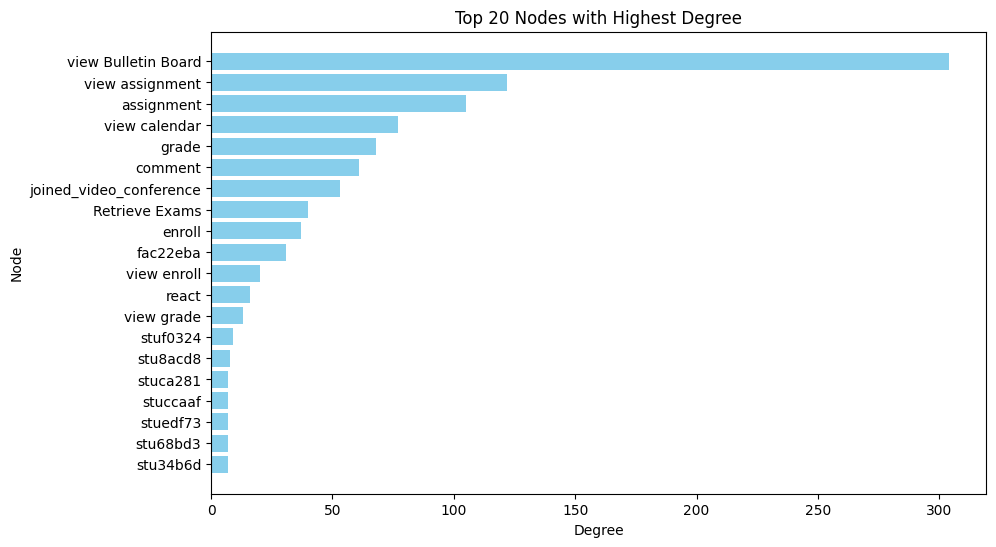

In [16]:
# Calculate degree of each node
degree_dict = dict(G.degree(G.nodes()))

# Sort nodes by degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)

# Get top 20 nodes with highest degree
top_20_nodes = sorted_degree[:20]

# Create DataFrame of top 20 nodes
top_20_df = pd.DataFrame(top_20_nodes, columns=['Node', 'Degree'])

# Display the DataFrame
print(top_20_df)

# Plot distribution of degrees of top 20 nodes
plt.figure(figsize=(10, 6))
plt.barh(top_20_df['Node'], top_20_df['Degree'], color='skyblue')
plt.xlabel('Degree')
plt.ylabel('Node')
plt.title('Top 20 Nodes with Highest Degree')
plt.gca().invert_yaxis()
plt.show()

### Tabular Data for Tasks Nodes and User Nodes with their respective Degree

In [17]:
# Define the user and task nodes
user_nodes = ['adm', 'fac', 'stu', 'par']
task_nodes = ['comment', 'Compute LOP', 'Encode Score Tutorial', 'Main Tutorial', 'react', 
              'Retrieve Exams', 'Retrieve Score Tutorial', 'Subject Mgt Tutorial', 'view assignment', 
              'view attendance', 'view Bulletin Board', 'view calendar', 'view collaborate', 
              'view enroll', 'view event', 'view grade', 'view register', 'get_assignment', 
              'get_raw_scores', 'get_student_answer', 'joined_video_conference', 'view_submission',
              'like', 'happy', 'surprise', 'sad', 'angry', 'assignment', 'attendance', 
              'Bulletin Board', 'collaborate', 'enroll', 'event', 'grade', 're-assign', 'register']

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Task Nodes', 'Admin', 'Faculty', 'Students', 'Parents', 'Total'])

# Iterate over the task nodes
for task in task_nodes:
    # Initialize a dictionary to store the counts
    counts = {'Admin': 0, 'Faculty': 0, 'Students': 0, 'Parents': 0}
    
    # Check if the task node is in the graph
    if task in G.nodes:
        # Get the neighbors of the task node
        neighbors = list(G.neighbors(task))
        
        # Iterate over the neighbors
        for neighbor in neighbors:
            # Check if the neighbor is a user node and increment the count
            if str(neighbor)[:3] in user_nodes:
                if str(neighbor)[:3] == 'adm':
                    counts['Admin'] += 1
                elif str(neighbor)[:3] == 'fac':
                    counts['Faculty'] += 1
                elif str(neighbor)[:3] == 'stu':
                    counts['Students'] += 1
                elif str(neighbor)[:3] == 'par':
                    counts['Parents'] += 1
    
    # Add the counts to the DataFrame using loc
    df.loc[len(df)] = [task, counts['Admin'], counts['Faculty'], counts['Students'], counts['Parents'], sum(counts.values())]

# Print the DataFrame
print(df)


                 Task Nodes  Admin  Faculty  Students  Parents  Total
0                   comment      0        0        60        1     61
1               Compute LOP      0        2         0        0      2
2     Encode Score Tutorial      0        0         0        0      0
3             Main Tutorial      0        1         0        0      1
4                     react      0        0        15        1     16
5            Retrieve Exams      0        0        40        0     40
6   Retrieve Score Tutorial      0        0         0        0      0
7      Subject Mgt Tutorial      0        0         0        0      0
8           view assignment      0        9       113        0    122
9           view attendance      0        0         0        0      0
10      view Bulletin Board      0       18       284        2    304
11            view calendar      0        3        74        0     77
12         view collaborate      0        1         0        0      1
13              view

### Count the Number of User Nodes 

In [18]:
# Initialize a dictionary to store the counts
user_counts = {'Admin': 0, 'Faculty': 0, 'Students': 0, 'Parents': 0}

# Iterate over the nodes in the graph
for node in G.nodes:
    # Check if the node is a user node and increment the count
    if str(node)[:3] in user_nodes:
        if str(node)[:3] == 'adm':
            user_counts['Admin'] += 1
        elif str(node)[:3] == 'fac':
            user_counts['Faculty'] += 1
        elif str(node)[:3] == 'stu':
            user_counts['Students'] += 1
        elif str(node)[:3] == 'par':
            user_counts['Parents'] += 1

# Print the counts
print("Number of Admin: ", user_counts['Admin'])
print("Number of Faculty: ", user_counts['Faculty'])
print("Number of Students: ", user_counts['Students'])
print("Number of Parents: ", user_counts['Parents'])


Number of Admin:  0
Number of Faculty:  24
Number of Students:  411
Number of Parents:  5


### Count the Number of Task Nodes 

In [19]:
# Initialize a dictionary to store the counts
task_counts = {task: 0 for task in task_nodes}

# Iterate over the nodes in the graph
for node in G.nodes:
    # Check if the node is a task node and increment the count
    if node in task_nodes:
        task_counts[node] += 1

# Print the counts
for task, count in task_counts.items():
    print(f"Number of '{task}': {count}")


Number of 'comment': 1
Number of 'Compute LOP': 1
Number of 'Encode Score Tutorial': 0
Number of 'Main Tutorial': 1
Number of 'react': 1
Number of 'Retrieve Exams': 1
Number of 'Retrieve Score Tutorial': 0
Number of 'Subject Mgt Tutorial': 0
Number of 'view assignment': 1
Number of 'view attendance': 0
Number of 'view Bulletin Board': 1
Number of 'view calendar': 1
Number of 'view collaborate': 1
Number of 'view enroll': 1
Number of 'view event': 0
Number of 'view grade': 1
Number of 'view register': 1
Number of 'get_assignment': 0
Number of 'get_raw_scores': 1
Number of 'get_student_answer': 0
Number of 'joined_video_conference': 1
Number of 'view_submission': 0
Number of 'like': 1
Number of 'happy': 0
Number of 'surprise': 0
Number of 'sad': 1
Number of 'angry': 1
Number of 'assignment': 1
Number of 'attendance': 0
Number of 'Bulletin Board': 0
Number of 'collaborate': 0
Number of 'enroll': 1
Number of 'event': 0
Number of 'grade': 1
Number of 're-assign': 0
Number of 'register': 1


In [20]:
# Initialize a dictionary to store the counts
user_counts = {'Admin': 0, 'Faculty': 0, 'Students': 0, 'Parents': 0}

# Iterate over the nodes in the graph
for node in G.nodes:
    # Check if the node is a user node and increment the count
    if str(node)[:3] in user_nodes:
        if str(node)[:3] == 'adm':
            user_counts['Admin'] += 1
        elif str(node)[:3] == 'fac':
            user_counts['Faculty'] += 1
        elif str(node)[:3] == 'stu':
            user_counts['Students'] += 1
        elif str(node)[:3] == 'par':
            user_counts['Parents'] += 1

# Print the counts
print("Number of Admin: ", user_counts['Admin'])
print("Number of Faculty: ", user_counts['Faculty'])
print("Number of Students: ", user_counts['Students'])
print("Number of Parents: ", user_counts['Parents'])


Number of Admin:  0
Number of Faculty:  24
Number of Students:  411
Number of Parents:  5


### Export the Graph into a GraphML file

In [21]:
nx.write_graphml_lxml(G, 'learning_interactions_jan.graphml')

### Replace the GraphML attribute ids

In [22]:
import re

def replace_graphml_attribute_ids(filename, replacements):
    with open(filename, 'r') as file:
        data = file.read()

    for old, new in replacements.items():
        data = re.sub(f'key id="d{old}"', f'key id="{new}"', data)
        data = re.sub(f'<data key="d{old}">', f'<data key="{new}">', data)

    with open(filename, 'w') as file:
        file.write(data)

# Usage:
replace_graphml_attribute_ids('C:/Users/boyma/OneDrive/Desktop/learning_interactions/SNA_code/january_2021/learning_interactions_jan.graphml', {0: 'eigenvectorCentrality', 1: 'betweennessCentrality'})


# Visualize the Network

In [23]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.degree_centrality(G))

In [24]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.betweenness_centrality(G))

In [25]:
#* Plot the graph using the plot_Gp function.
#plot_Gp(G, measures=nx.eigenvector_centrality(G))

# Basic Topological Attributes

In [26]:
print(G)

Graph with 461 nodes and 962 edges


In [27]:
# Graph Density
density = nx.density(G)

print("Network density:", density)

Network density: 0.009072903895124022


# Centrality Measures 

## Degree Centrality 

In [28]:
#* Calculate the degree centrality of the graph.
degree = nx.degree_centrality(G)

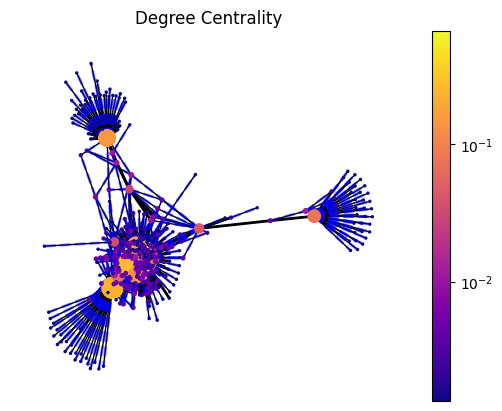

In [29]:
#* Draw the graph with node sizes proportional to their degree centrality.
draw(G, degree, 'Degree Centrality')

In [30]:
#* Sort the nodes by their degree centrality and print the sorted list.
x = degree
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('view Bulletin Board', 0.6608695652173913)
('view assignment', 0.26521739130434785)
('assignment', 0.2282608695652174)
('view calendar', 0.1673913043478261)
('grade', 0.14782608695652175)
('comment', 0.13260869565217392)
('joined_video_conference', 0.11521739130434783)
('Retrieve Exams', 0.08695652173913043)
('enroll', 0.08043478260869566)
('fac22eba', 0.06739130434782609)
('view enroll', 0.043478260869565216)
('react', 0.034782608695652174)
('view grade', 0.02826086956521739)
('stuf0324', 0.01956521739130435)
('stu8acd8', 0.017391304347826087)
('stuca281', 0.015217391304347827)
('stuccaaf', 0.015217391304347827)
('stuedf73', 0.015217391304347827)
('stu68bd3', 0.015217391304347827)
('stu34b6d', 0.015217391304347827)
('stu44017', 0.015217391304347827)
('stu43fce', 0.015217391304347827)
('stu9ad77', 0.013043478260869566)
('stu00d63', 0.013043478260869566)
('stuafe76', 0.013043478260869566)
('stubab2c', 0.013043478260869566)
('stu4db39', 0.013043478260869566)
('stu6d5d6', 0.0130434782608

In [31]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('degree_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Degree_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Degree_Centrality': item[1]})

### Top 10 Task Nodes with the Highest Degree Centrality Scores

In [32]:
# Print the top 10 nodes with the highest degree centrality
print("Top 10 nodes with the highest degree centrality:")
for item in sorted_x[:10]:
    print(item)

Top 10 nodes with the highest degree centrality:
('view Bulletin Board', 0.6608695652173913)
('view assignment', 0.26521739130434785)
('assignment', 0.2282608695652174)
('view calendar', 0.1673913043478261)
('grade', 0.14782608695652175)
('comment', 0.13260869565217392)
('joined_video_conference', 0.11521739130434783)
('Retrieve Exams', 0.08695652173913043)
('enroll', 0.08043478260869566)
('fac22eba', 0.06739130434782609)


### Top 10 Nodes with the Highest Degree Centrality

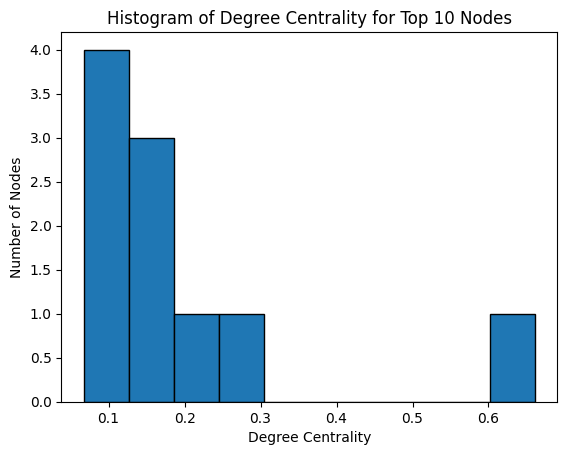

In [33]:
top_10_nodes = sorted_x[:10]

# Get the degree centrality values of the top 10 nodes
top_10_values = [item[1] for item in top_10_nodes]

# Create a histogram of the degree centrality for the top 10 nodes
plt.hist(top_10_values, bins=10, edgecolor='black')
plt.title('Histogram of Degree Centrality for Top 10 Nodes')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.show()

## Eigenvector Centrality 

In [34]:
#* Calculate the eigenvector centrality of the graph.
#eigenvector = nx.eigenvector_centrality(G, max_iter=1000)

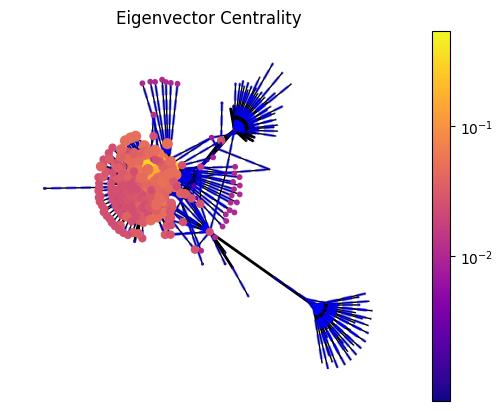

In [35]:
#* Draw the graph with node sizes proportional to their eigenvector centrality.
draw(G, eigenvector, 'Eigenvector Centrality')

In [36]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = eigenvector
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('view Bulletin Board', 0.536822605760548)
('view assignment', 0.29397700982378777)
('assignment', 0.2172232081545633)
('comment', 0.1587566645018756)
('view calendar', 0.15822126209452095)
('fac22eba', 0.1290110426596727)
('joined_video_conference', 0.09730774165358873)
('Retrieve Exams', 0.07916743993032692)
('stu8acd8', 0.07707485262274488)
('stuf0324', 0.07454326458198327)
('stuca281', 0.07342212481074122)
('stu34b6d', 0.07342212481074122)
('stu43fce', 0.07342212481074122)
('stuedf73', 0.07258514485402874)
('stu44017', 0.07258514485402874)
('stu9ad77', 0.06893241704202507)
('stubab2c', 0.06893241704202507)
('stu45f33', 0.06893241704202507)
('stu00d63', 0.06612191143007033)
('stu4db39', 0.06612191143007033)
('stu6d5d6', 0.06612191143007033)
('stuafe76', 0.06528493147335786)
('stu68bd3', 0.06212770063629374)
('stu7d797', 0.061632203661354176)
('stub61f5', 0.061632203661354176)
('stu32c56', 0.061632203661354176)
('stu438b2', 0.061632203661354176)
('stuee1f4', 0.061632203661354176)
('s

### Nodes with Top Eigenvector Centrality Scores

In [37]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('eigenvector_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Influence_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Influence_Centrality': item[1]})

### Top 5 User Nodes with the Highest Eigenvector Centrality 

In [38]:
# Filter the nodes based on the first three characters
user_eigenvector = {node: eigenvector[node] for node in eigenvector if str(node)[:3] in ['adm', 'fac', 'stu', 'par']}


# Sort the user nodes by their eigenvector centrality and get the top 5
sorted_user_eigenvector = sorted(user_eigenvector.items(), key=lambda kv: kv[1], reverse=True)
top_5_user_nodes = sorted_user_eigenvector[:5]

# Get the eigenvector centrality values of the top 5 user nodes
top_5_user_values = [item[1] for item in top_5_user_nodes]

In [39]:
# Print the top 5 user nodes with the highest eigenvector centrality
print("Top 5 user nodes with the highest eigenvector centrality:")
for item in top_5_user_nodes:
    print(item)

Top 5 user nodes with the highest eigenvector centrality:
('fac22eba', 0.1290110426596727)
('stu8acd8', 0.07707485262274488)
('stuf0324', 0.07454326458198327)
('stuca281', 0.07342212481074122)
('stu34b6d', 0.07342212481074122)


### Histogram for Eigenvector Centrality

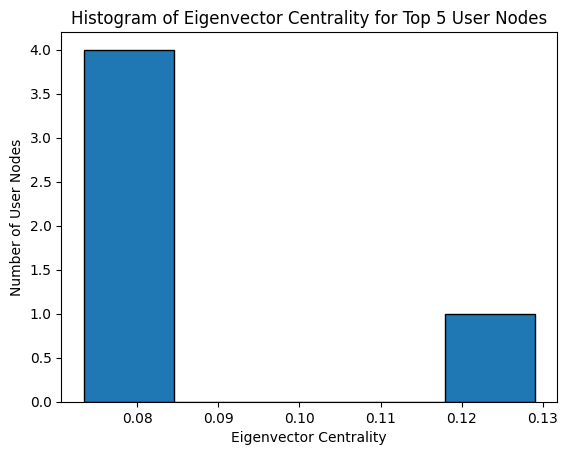

In [40]:
# Create a histogram of the eigenvector centrality for the top 5 user nodes
plt.hist(top_5_user_values, bins=5, edgecolor='black')
plt.title('Histogram of Eigenvector Centrality for Top 5 User Nodes')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Number of User Nodes')
plt.show()

## Betweenness Centrality 

In [41]:
#* Calculate the betweenness centrality of the graph.
#betweenness = nx.betweenness_centrality(G)

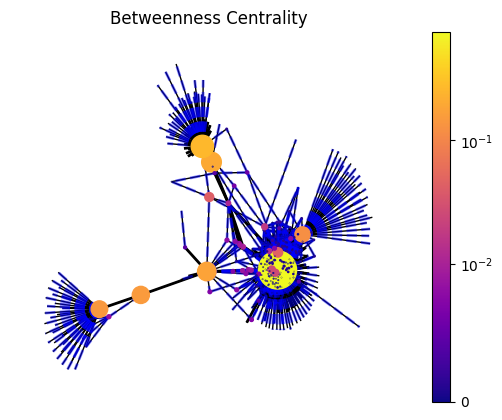

In [42]:
#* Draw the graph with node sizes proportional to their betweenness centrality.
draw(G, betweenness, 'Betweenness Centrality')

In [43]:
#* Sort the nodes by their betweenness centrality and print the sorted list.
x = nx.betweenness_centrality(G)
sorted_x = sorted(x.items(), key=lambda kv: kv[1], reverse=True)
for item in sorted_x:
    print(item)

('view Bulletin Board', 0.7525676419641656)
('grade', 0.25727936620631114)
('facdeb9e', 0.2004907794775188)
('view enroll', 0.1775019190376048)
('fac6fdcb', 0.15196173155252446)
('enroll', 0.14247418774272994)
('assignment', 0.11958483148736092)
('view assignment', 0.04611324191843342)
('stu92888', 0.04145580212656341)
('stud4f4a', 0.0273796860951623)
('view calendar', 0.024907616973019412)
('joined_video_conference', 0.018136593272529696)
('react', 0.017794865535849694)
('stu4bc1f', 0.012767104545712568)
('view grade', 0.010643031652288821)
('stubb559', 0.010385899595063482)
('stud7448', 0.00941737823456108)
('stuecee3', 0.009236083796221635)
('stu41c98', 0.008847539882021105)
('stubd33b', 0.008380059816481308)
('register', 0.008042057402671209)
('stu61750', 0.007847097758915591)
('stu52a6b', 0.007847097758915591)
('stu57d65', 0.007847097758915591)
('stu4f6db', 0.00780712801073184)
('stu6d6f9', 0.00780712801073184)
('comment', 0.007311843415004012)
('fac22eba', 0.0072963800698203525)


### Nodes with Top Betweenness Scores

In [44]:
# Write the sorted nodes and their degree centrality scores into a CSV file.
with open('betweenness_centrality_scores.csv', 'w', newline='') as csvfile:
    fieldnames = ['Node', 'Betweenness_Centrality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for item in sorted_x:
        writer.writerow({'Node': item[0], 'Betweenness_Centrality': item[1]})

### Top 5 User Nodes with the Highest Betweenness Centrality Scores

In [45]:
# Filter the nodes based on the first three characters
user_betweenness = {node: betweenness[node] for node in betweenness if str(node)[:3] in ['adm', 'fac', 'stu', 'par']}

# Sort the user nodes by their betweenness centrality and get the top 5
sorted_user_betweenness = sorted(user_betweenness.items(), key=lambda kv: kv[1], reverse=True)
top_5_user_nodes = sorted_user_betweenness[:5]

# Get the betweenness centrality values of the top 5 user nodes
top_5_user_values = [item[1] for item in top_5_user_nodes]

In [46]:
# Print the top 5 user nodes with the highest betweenness centrality
print("Top 5 user nodes with the highest betweenness centrality:")
for item in top_5_user_nodes:
    print(item)

Top 5 user nodes with the highest betweenness centrality:
('facdeb9e', 0.2004907794775188)
('fac6fdcb', 0.15196173155252446)
('stu92888', 0.04145580212656341)
('stud4f4a', 0.0273796860951623)
('stu4bc1f', 0.012767104545712568)


### Histogram for Betweenness Centrality

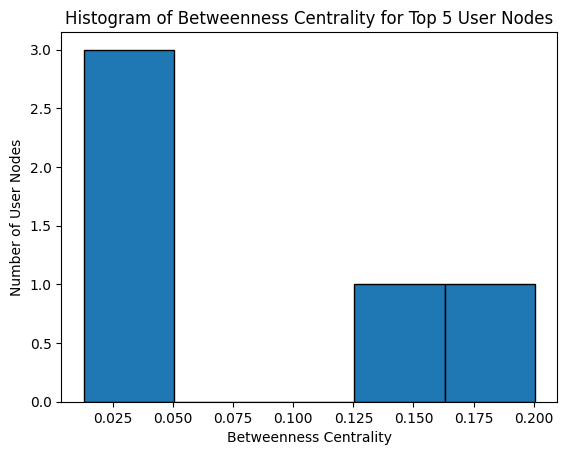

In [47]:
# Create a histogram of the betweenness centrality for the top 5 user nodes
plt.hist(top_5_user_values, bins=5, edgecolor='black')
plt.title('Histogram of Betweenness Centrality for Top 5 User Nodes')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Number of User Nodes')
plt.show()